In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from joblib import dump
from joblib import load
from sklearn.metrics import confusion_matrix
from sklearn.manifold import TSNE
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [3]:
try:
    from StringIO import StringIO
except ImportError:
    from io import StringIO

In [5]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

### Train and Test Data

In [6]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [7]:
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [8]:
test.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING


In [9]:
print(train.shape)
print(test.shape)

(7352, 563)
(2947, 563)


### Exploratory Data Analysis

In [10]:
train.isnull().any()

tBodyAcc-mean()-X       False
tBodyAcc-mean()-Y       False
tBodyAcc-mean()-Z       False
tBodyAcc-std()-X        False
tBodyAcc-std()-Y        False
                        ...  
angle(X,gravityMean)    False
angle(Y,gravityMean)    False
angle(Z,gravityMean)    False
subject                 False
Activity                False
Length: 563, dtype: bool

In [11]:
test.isnull().any()

tBodyAcc-mean()-X       False
tBodyAcc-mean()-Y       False
tBodyAcc-mean()-Z       False
tBodyAcc-std()-X        False
tBodyAcc-std()-Y        False
                        ...  
angle(X,gravityMean)    False
angle(Y,gravityMean)    False
angle(Z,gravityMean)    False
subject                 False
Activity                False
Length: 563, dtype: bool

### Train Data Vizualization 

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

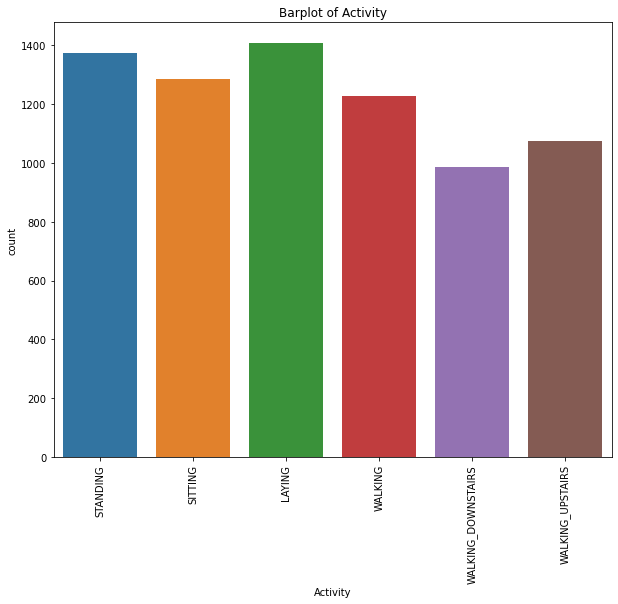

In [12]:
plt.figure(figsize=(10,8))
plt.title('Barplot of Activity')
sns.countplot(train.Activity)
plt.xticks(rotation=90)

Wall time: 0 ns
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 7352 samples in 1.380s...
[t-SNE] Computed neighbors for 7352 samples in 45.078s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.437672
[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.125595
[t-SNE] KL divergence after 1000 iterations: 1.282857


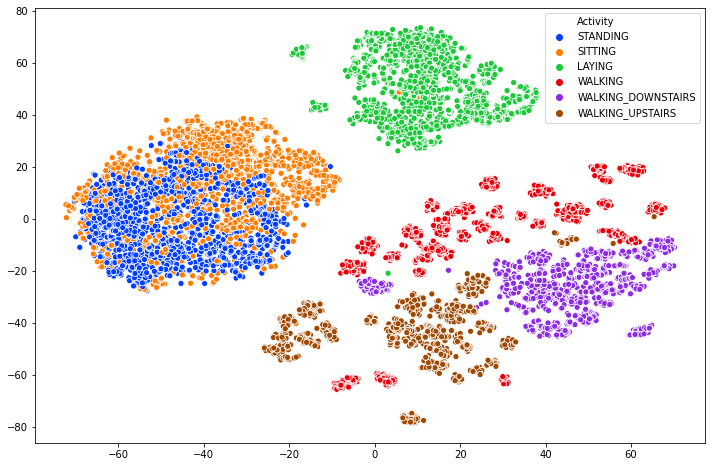

In [13]:
X_for_tsne = train.drop(['subject', 'Activity'], axis=1)
%time
tsne = TSNE(random_state = 42, n_components=2, verbose=1, perplexity=50, n_iter=1000).fit_transform(X_for_tsne)
plt.figure(figsize=(12,8))
sns.scatterplot(x =tsne[:, 0], y = tsne[:, 1], hue = train["Activity"],palette="bright")

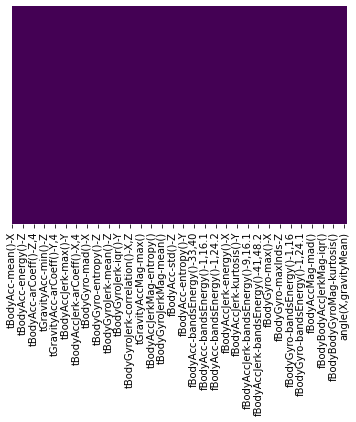

In [14]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [15]:
train.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,17.413085
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122,8.975143
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414,8.000000
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181,19.000000
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659,26.000000
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000,30.000000


In [16]:
train.Activity.unique()

array(['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

In [17]:
train.Activity.value_counts()

LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: Activity, dtype: int64

In [18]:
X_train = train.drop('Activity', axis=1)
y_train = train['Activity']
X_test = test.drop('Activity', axis=1)
y_test = test['Activity']

### Decision Tree Classifier

#### Using RandomizedSearchCV to find the best depth

In [19]:
parameters_for_decision_tree = {'max_depth' : [5,6,7,8,9,10,15], 
                                'min_samples_leaf': [2,4,6], 
                                'criterion': ['gini', 'entropy']}
clf = DecisionTreeClassifier()
rs_cv_classifier = RandomizedSearchCV(clf, param_distributions=parameters_for_decision_tree, random_state=42)
rs_cv_classifier.fit(X_train, y_train)
rs_cv_pred = rs_cv_classifier.predict(X_test)

print('Classifier Accuracy Score: ', accuracy_score(y_test, rs_cv_pred))

Classifier Accuracy Score:  0.8605361384458772


#### Saving The Decision Tree Classifier

In [20]:
dump(rs_cv_classifier, 'rs_cv_model.joblib') 

['rs_cv_model.joblib']

In [21]:
rs_cv_model = load('rs_cv_model.joblib')
rs_cv_model

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=None,
       

In [22]:
rs_cv_pred = rs_cv_model.predict(X_test)
print('Classifier Accuracy Score: ', accuracy_score(y_test, rs_cv_pred))

Classifier Accuracy Score:  0.8605361384458772


#### Confusion Matrix

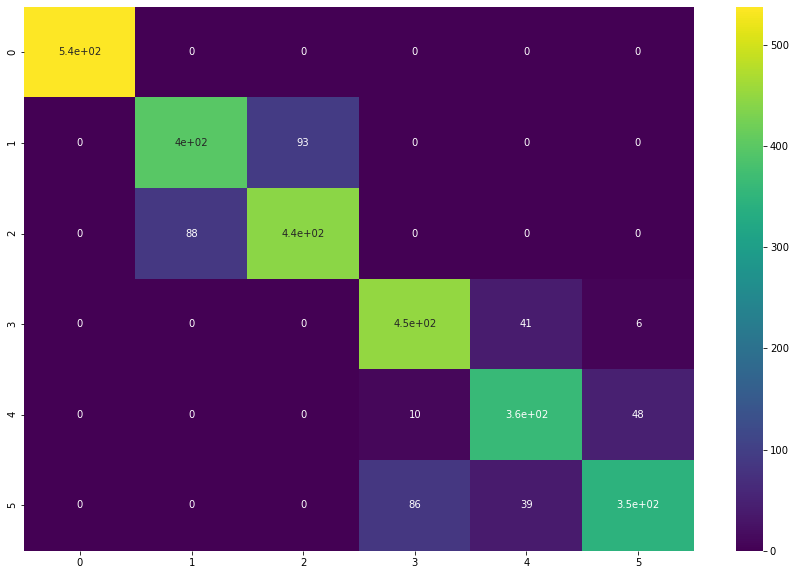

In [23]:
colormap = plt.cm.viridis
cf_matrix = confusion_matrix(y_test.values, rs_cv_pred)
f,ax=plt.subplots(figsize=(15,10))
sns.heatmap(cf_matrix, annot=True, ax=ax, cmap=colormap)
plt.show()

#### Classification Report

In [24]:
print(classification_report(y_test, rs_cv_pred))

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.82      0.81      0.81       491
          STANDING       0.83      0.83      0.83       532
           WALKING       0.82      0.91      0.86       496
WALKING_DOWNSTAIRS       0.82      0.86      0.84       420
  WALKING_UPSTAIRS       0.86      0.73      0.79       471

          accuracy                           0.86      2947
         macro avg       0.86      0.86      0.86      2947
      weighted avg       0.86      0.86      0.86      2947



In [25]:
print('Model Best Parameters: ', rs_cv_model.best_params_)
print('Model Best Parameters: ', rs_cv_model.best_score_)

Model Best Parameters:  {'min_samples_leaf': 6, 'max_depth': 6, 'criterion': 'entropy'}
Model Best Parameters:  0.8669746620606095


 ### K - Nearest Neighbor

In [26]:
parameters_for_knn = {'leaf_size' : [100, 200, 400],
                        'n_neighbors' : [5, 10, 15, 20],
                         'weights' :['uniform', 'distance']}
knn = KNeighborsClassifier()

knn_grid_search_cv = GridSearchCV(knn, parameters_for_knn, cv = 10)

knn_grid_search_cv.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'leaf_size': [100, 200, 400],
                         'n_neighbors': [5, 10, 15, 20],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [27]:
knn_grid_search_cv.cv_results_

{'mean_fit_time': array([0.9833288 , 1.01018047, 0.97393866, 1.03180003, 1.00484285,
        1.0009861 , 0.95736079, 0.95537102, 0.86311636, 0.83865423,
        0.84260538, 0.81234019, 0.81643698, 0.82432711, 0.83826373,
        0.81385148, 0.69424596, 0.72932589, 0.69188905, 0.71505296,
        0.68060167, 0.73592076, 0.73995571, 0.75275621]),
 'std_fit_time': array([0.06628775, 0.06133024, 0.02741047, 0.03346197, 0.02662681,
        0.0371974 , 0.04174371, 0.03046969, 0.02637069, 0.04391606,
        0.02216211, 0.02602417, 0.02653173, 0.03268621, 0.02836933,
        0.01965087, 0.02920461, 0.05515497, 0.03741543, 0.01354451,
        0.03011129, 0.04008596, 0.02800346, 0.04655738]),
 'mean_score_time': array([1.06189265, 1.07332931, 1.10777717, 1.13303299, 1.21390772,
        1.17987356, 1.23332827, 1.17406003, 1.04527724, 1.01447372,
        1.08605642, 1.03799293, 1.08341451, 1.07243233, 1.13417971,
        1.11480918, 1.02674885, 1.005845  , 1.08556042, 1.03169703,
        1.082973

In [28]:
knn_prediction = knn_grid_search_cv.predict(X_test)

print('Accuracy Scoore for K-Nearest Neighbors:', accuracy_score(y_test, knn_prediction))

Accuracy Scoore for K-Nearest Neighbors: 0.8113335595520869


#### Saving K - Nearest Neighbors Model

In [29]:
dump(knn_grid_search_cv, 'knn_grid_search_model.joblib')

['knn_grid_search_model.joblib']

In [30]:
knn_grid_search_cv_model = load('knn_grid_search_model.joblib')

In [31]:
print('Model Best Parameters: ', knn_grid_search_cv_model.best_params_)
print('Model Best Parameters: ', knn_grid_search_cv_model.best_score_)

Model Best Parameters:  {'leaf_size': 100, 'n_neighbors': 10, 'weights': 'distance'}
Model Best Parameters:  0.8291759094942324
